### Project Artificial Neural Network - José Lise
## House prices: Regression based on Ames Housing Dataset


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

from pandas.plotting import scatter_matrix

import seaborn as sns


%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Read in the dataset as a dataframe
train_df = pd.read_csv('train.csv')
test_df  = pd.read_csv('test.csv')
train_df.shape, test_df.shape

((1460, 81), (1459, 80))

In [3]:
# Raw statistics 
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [3]:
#check for dupes for Id
idsUnique = len(set(train_df.Id))
idsTotal = train_df.shape[0]
idsdupe = idsTotal - idsUnique
print(idsdupe)

0


## Exploratory Data Analysis

In [5]:
# Preview the data we're working with
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


We see above that there will be null values to manage.
Check how features are correlated to each other and to SalePrice.

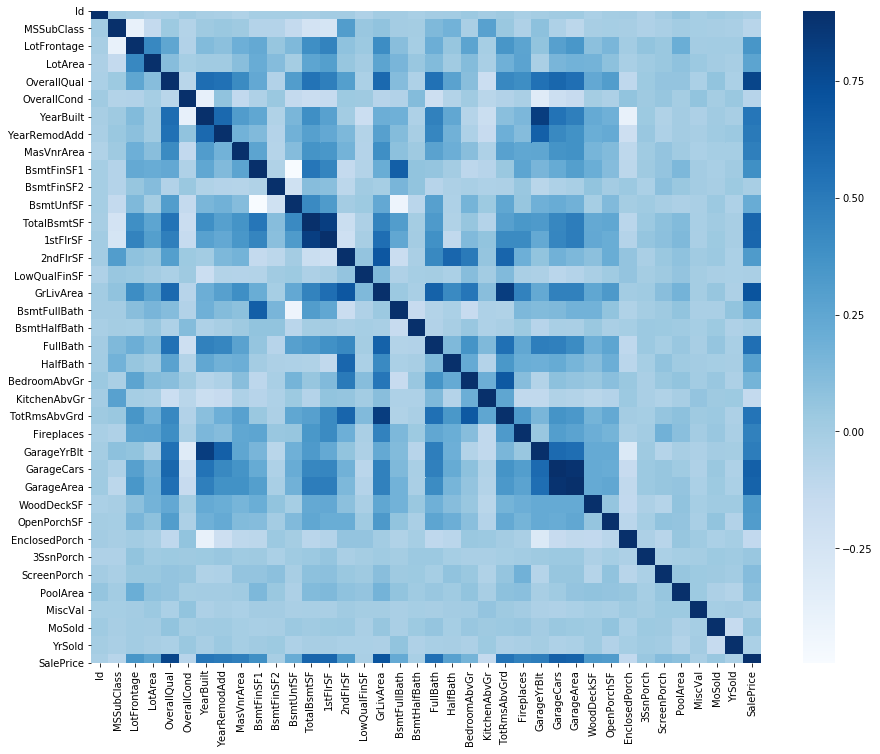

In [5]:
corr = train_df.corr()
plt.subplots(figsize=(15,12))
sns.heatmap(corr, vmax=0.9, cmap="Blues", square=True)

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')


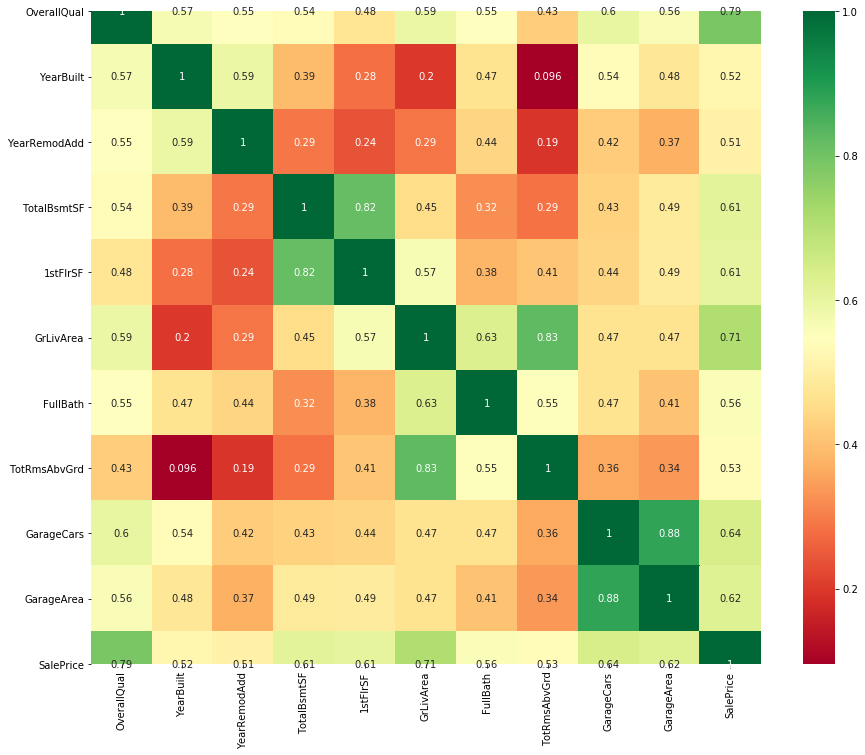

In [6]:
# Check the most correlated features 
top_corr_features = corr.index[abs(corr["SalePrice"])>0.5]
plt.figure(figsize=(15,12))
g = sns.heatmap(train_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
print(train_df[top_corr_features].columns)

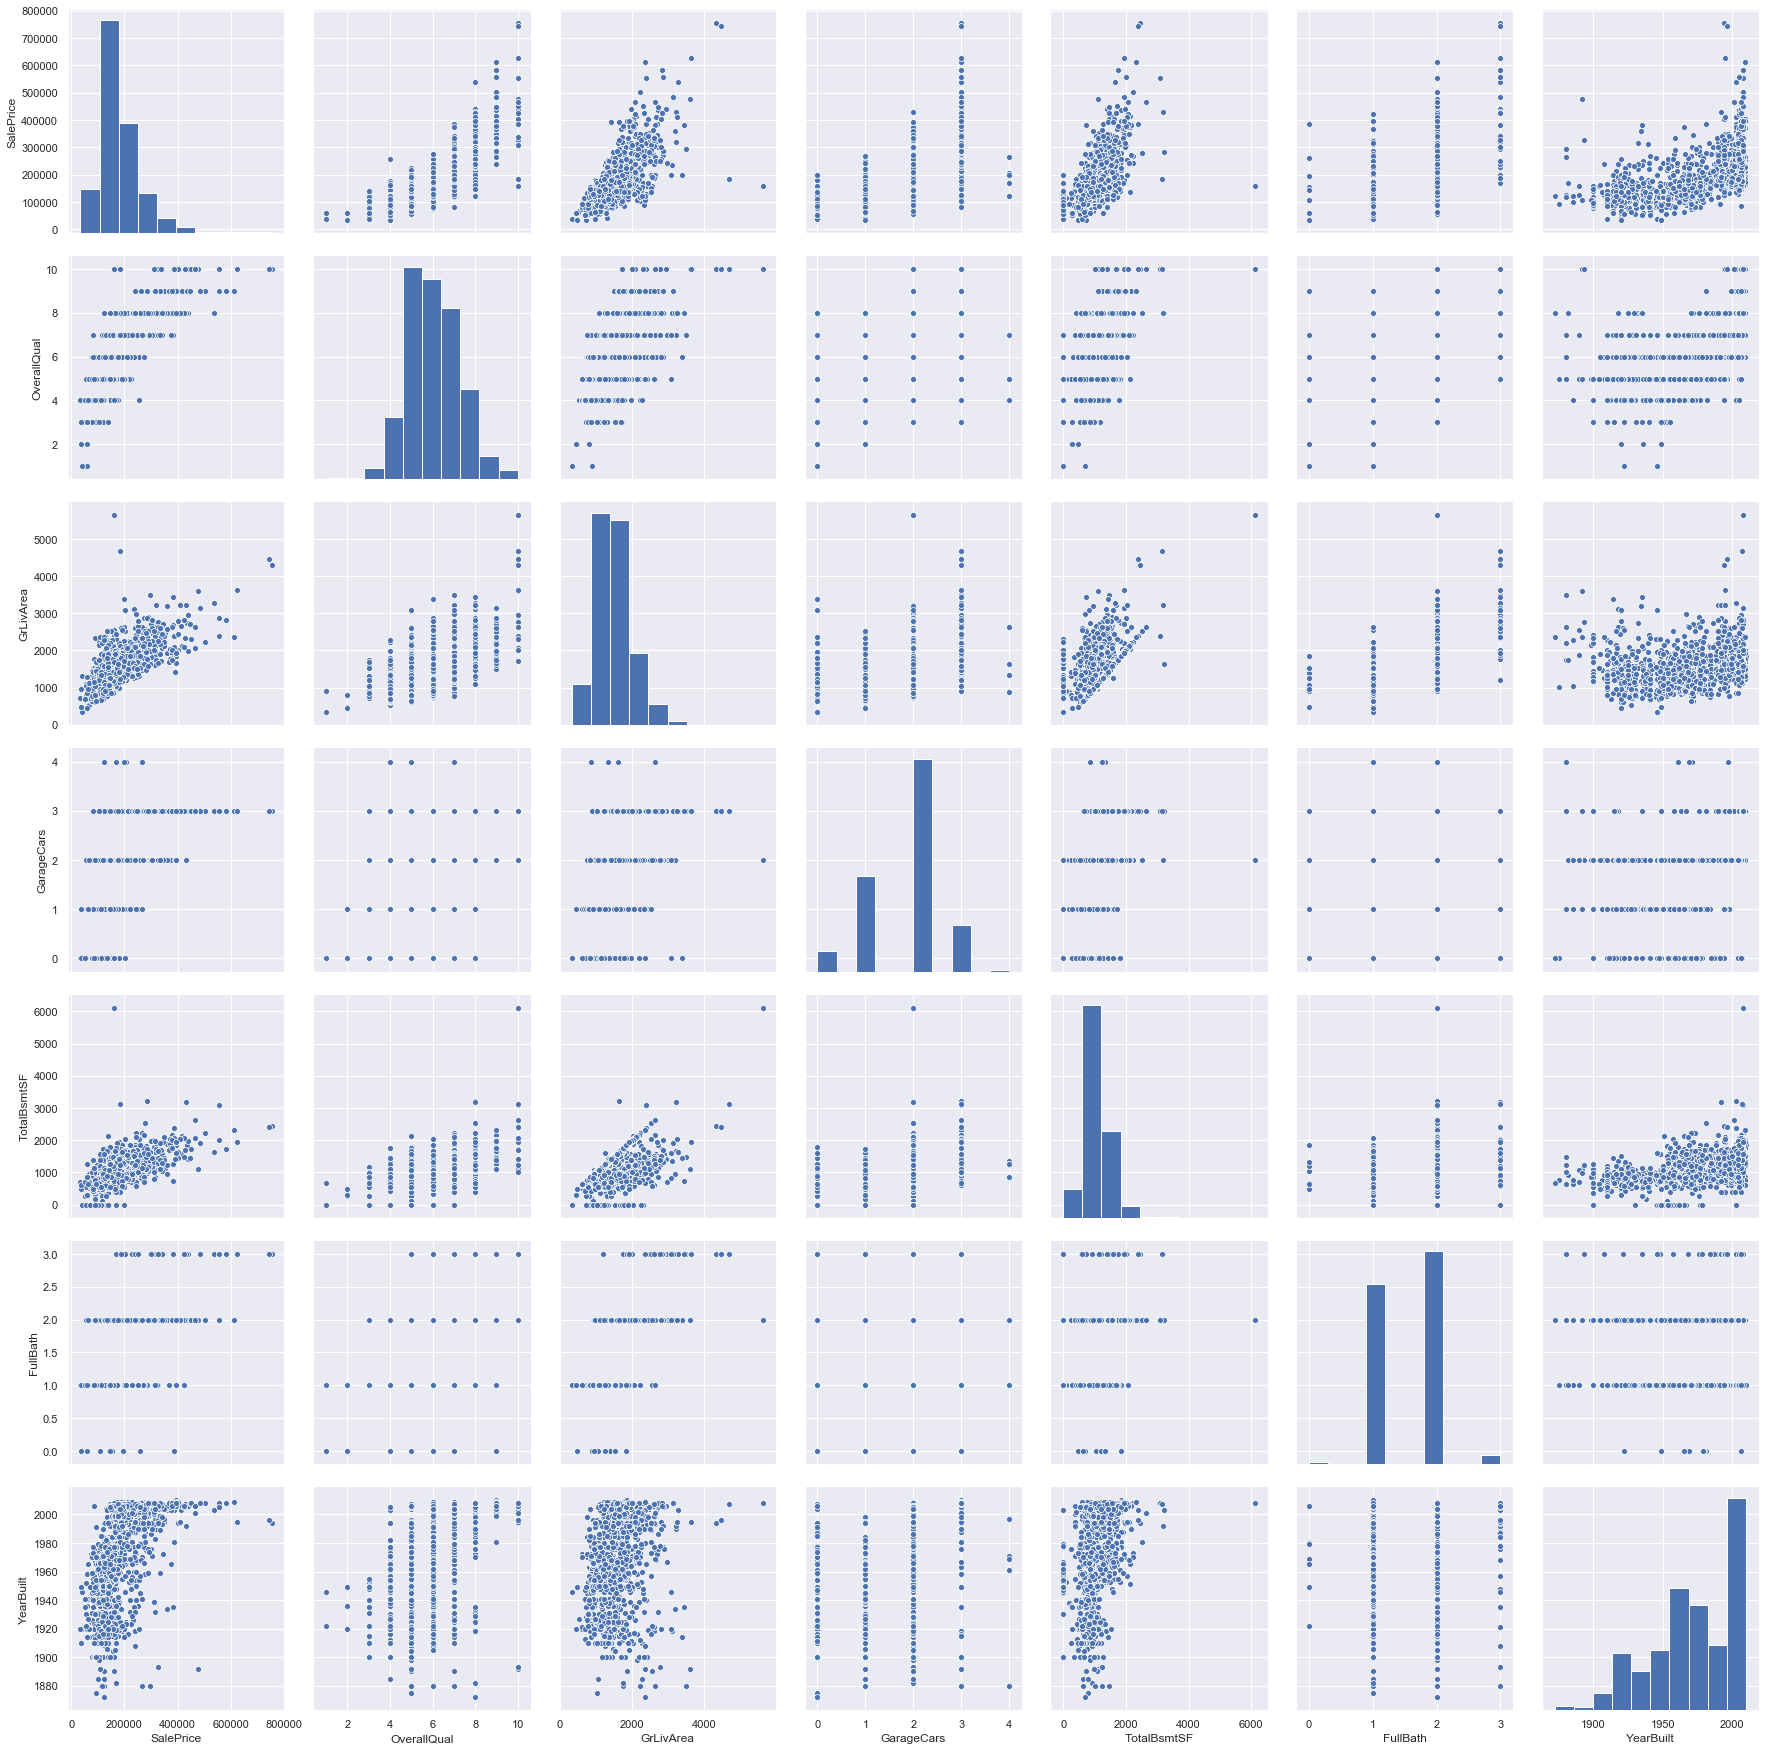

In [7]:
# Check how each feature is correlated to SalePrice
# 1stFlrSF is highly correlated to TotalBsmSF, therefore we will only keep TotalBsmSF
# GarageCars and GarageArea are highly correlated therefore we will only keep GarageCars
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_df[cols], height = 3.5)
plt.show();



We see that SalePrice is correlated to OverallQual, YearBuilt, TotalBsmtSF, LotArea, GrLivArea. Let's take a look at those specific features: 


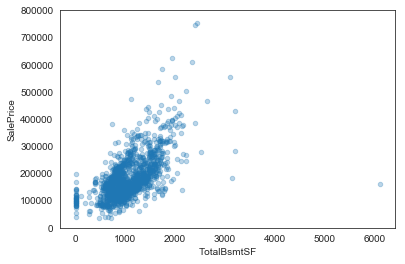

In [12]:
data = pd.concat([train_df['SalePrice'], train_df['TotalBsmtSF']], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', alpha=0.3, ylim=(0,800000))

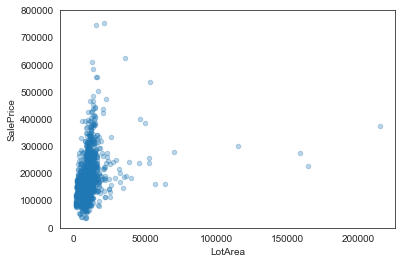

In [13]:
data = pd.concat([train_df['SalePrice'], train_df['LotArea']], axis=1)
data.plot.scatter(x='LotArea', y='SalePrice', alpha=0.3, ylim=(0,800000))

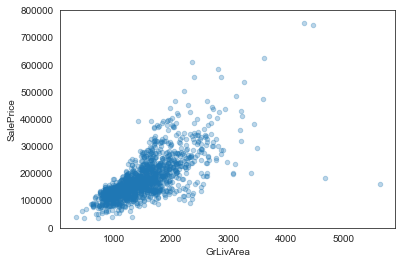

In [14]:
data = pd.concat([train_df['SalePrice'], train_df['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', alpha=0.3, ylim=(0,800000))

In [4]:
# Remove the Ids from train and test, as they are unique for each row and hence not useful for the model
train_ID = train_df['Id']
test_ID = test_df['Id']
train_df.drop(['Id'], axis=1, inplace=True)
test_df.drop(['Id'], axis=1, inplace=True)
train_df.shape, test_df.shape

((1460, 80), (1459, 79))

SalePrice is the variable we need to predict. So let's do some analysis on this variable first.


 mu = 12.02 and sigma = 0.40



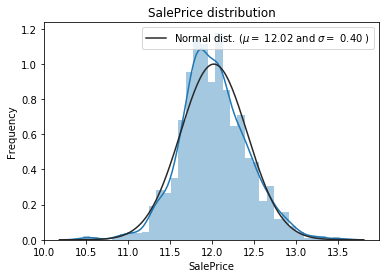

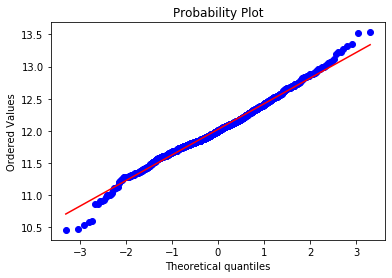

In [6]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

def display_dist(df,f):
    
    sns.distplot(df[f] , fit=norm);

# Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(df[f])
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
    plt.ylabel('Frequency')
    plt.title('SalePrice distribution')

    fig = plt.figure()
    res = stats.probplot(df[f], plot=plt)
    plt.show()

display_dist(train_df,'SalePrice')

We see a positive skew. This can be fixed by applying a log1p function. 

In [5]:
train_df.SalePrice = np.log1p(train_df.SalePrice )
#y = train_df.SalePrice

SalePrice distribution after log normalisation


 mu = 12.02 and sigma = 0.40



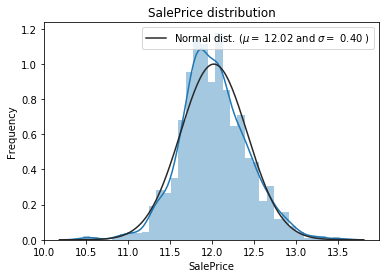

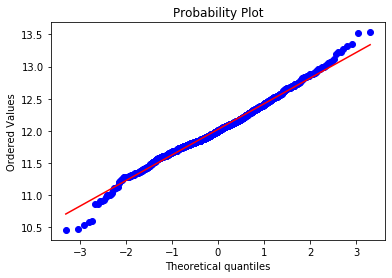

In [6]:
display_dist(train_df,'SalePrice')

### Pre-processing

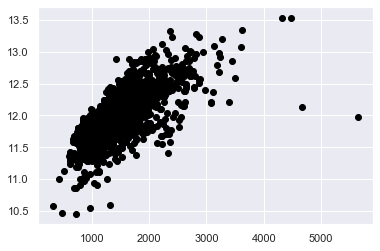

In [12]:
plt.scatter(y =train_df.SalePrice,x = train_df.GrLivArea,c = 'black')
plt.show()
#we can see the outlier in the below image

### Removing outliers


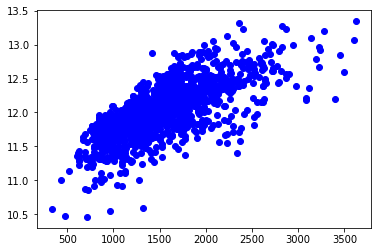

In [7]:
# Looking for outliers, as indicated in https://ww2.amstat.org/publications/jse/v19n3/decock.pdf
train_df = train_df[train_df.GrLivArea < 4000]
y = train_df.SalePrice
plt.scatter(y =train_df.SalePrice,x = train_df.GrLivArea,c = 'blue')
plt.show()

Concatenation of the train and test datasets in the same dataset for preprocessing. 

In [8]:
ntrain = train_df.shape[0]
ntest = test_df.shape[0]
y_train = train_df.SalePrice.values
all_data = pd.concat((train_df, test_df)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2915, 79)


Missing data processing

In [9]:
#train_nas = train_df.isnull().sum()
#train_nas = train_nas[train_nas>0]
#train_nas.sort_values(ascending=False)
all_data_nas = all_data.isnull().sum()
all_data_nas = all_data_nas[all_data_nas>0]
all_data_nas.sort_values(ascending=False)


PoolQC          2907
MiscFeature     2810
Alley           2717
Fence           2345
FireplaceQu     1420
LotFrontage      486
GarageQual       159
GarageCond       159
GarageFinish     159
GarageYrBlt      159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Electrical         1
BsmtUnfSF          1
Exterior1st        1
Exterior2nd        1
TotalBsmtSF        1
GarageArea         1
GarageCars         1
BsmtFinSF2         1
BsmtFinSF1         1
KitchenQual        1
SaleType           1
dtype: int64

In [19]:
#test_nas = test_df.isnull().sum()
#test_nas = test_nas[test_nas>0]
#test_nas.sort_values(ascending = False)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageCond        78
GarageQual        78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Exterior2nd        1
Exterior1st        1
SaleType           1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
KitchenQual        1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
dtype: int64

In [10]:
print("Find most important features relative to target")
corr = train_df.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)
#this you can see at the time of heatmap also.

#Keep the 10 more important features to create polynomials
poly = corr.SalePrice[1:11]
print(poly)

Find most important features relative to target
SalePrice        1.000000
OverallQual      0.819240
GrLivArea        0.718844
GarageCars       0.680408
GarageArea       0.655212
TotalBsmtSF      0.641553
1stFlrSF         0.613742
FullBath         0.590919
YearBuilt        0.588977
YearRemodAdd     0.568986
GarageYrBlt      0.544005
TotRmsAbvGrd     0.533446
Fireplaces       0.487126
MasVnrArea       0.430073
BsmtFinSF1       0.382710
LotFrontage      0.363286
WoodDeckSF       0.330573
OpenPorchSF      0.327038
HalfBath         0.311191
2ndFlrSF         0.306605
LotArea          0.258945
BsmtFullBath     0.238851
BsmtUnfSF        0.223248
BedroomAbvGr     0.204117
ScreenPorch      0.123860
MoSold           0.062231
3SsnPorch        0.056065
PoolArea         0.040679
BsmtFinSF2       0.006420
BsmtHalfBath    -0.014974
MiscVal         -0.019752
YrSold          -0.034319
OverallCond     -0.036843
LowQualFinSF    -0.037698
MSSubClass      -0.075083
KitchenAbvGr    -0.147891
EnclosedPorch   

In [114]:
#poly.shape
#print(poly.index.values[0])
# Add polynomial features for more 10 important features
for i in range(10):
    if poly.index[i] not in ['GrLivArea','TotalBsmtSF','YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
        print(poly.index[i])
        col = poly.index.values[i]
        all_data[col+'-2'] = all_data.loc[:,col]**2
        all_data[col+'-3'] = all_data.loc[:,col]**3
        #all_data[col+'-4'] = all_data.loc[:,col]**4
        #all_data[col+'-sqrt'] = np.sqrt(np.absolute(all_data.loc[:,col]))
    
all_data.shape

OverallQual
GarageCars
GarageArea
1stFlrSF
FullBath


(2915, 89)

In [11]:
# Differentiate numerical features (minus the target) and categorical features
categorical_features = all_data.select_dtypes(include=['object']).columns
print(categorical_features,"\n", len(categorical_features))


Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
       'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood',
       'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       'SaleType', 'Street', 'Utilities'],
      dtype='object') 
 43


In [12]:
numerical_features = all_data.select_dtypes(exclude = ["object"]).columns
print(numerical_features,"\n", len(numerical_features))

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal',
       'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea',
       'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt',
       'YearRemodAdd', 'YrSold'],
      dtype='object') 
 36


In [13]:
# Differentiate numerical features (minus the target) and categorical features
categorical_features = all_data.select_dtypes(include = ["object"]).columns
numerical_features = all_data.select_dtypes(exclude = ["object"]).columns
#numerical_features = numerical_features.drop("SalePrice")
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
all_num = all_data[numerical_features]
all_cat = all_data[categorical_features]

Numerical features : 36
Categorical features : 43


In [14]:
# Handle missing values for numerical features by using median as replacement
print("NAs for numerical features in train : " + str(all_num.isnull().values.sum()))
all_num = all_num.fillna(all_num.median())
print("Remaining NAs for numerical features in All : " + str(all_num.isnull().values.sum()))


NAs for numerical features in train : 678
Remaining NAs for numerical features in All : 0


In [15]:
from scipy.stats import skew 
skewness = all_num.apply(lambda x: skew(x))
skewness.sort_values(ascending=False)

MiscVal          21.932147
PoolArea         18.701829
LotArea          13.123758
LowQualFinSF     12.080315
3SsnPorch        11.368094
KitchenAbvGr      4.298845
BsmtFinSF2        4.142863
EnclosedPorch     4.000796
ScreenPorch       3.943508
BsmtHalfBath      3.942892
MasVnrArea        2.600697
OpenPorchSF       2.529245
WoodDeckSF        1.848285
MSSubClass        1.374804
1stFlrSF          1.253011
LotFrontage       1.245296
GrLivArea         0.977860
BsmtFinSF1        0.974092
BsmtUnfSF         0.920498
2ndFlrSF          0.843237
TotRmsAbvGrd      0.749579
Fireplaces        0.725958
HalfBath          0.698770
TotalBsmtSF       0.667372
BsmtFullBath      0.622820
OverallCond       0.569143
BedroomAbvGr      0.328129
GarageArea        0.219649
MoSold            0.198411
OverallQual       0.181902
FullBath          0.159917
YrSold            0.130909
GarageCars       -0.218414
GarageYrBlt      -0.396584
YearRemodAdd     -0.449113
YearBuilt        -0.598087
dtype: float64

In [17]:
skewness = skewness[abs(skewness)>0.5]
skewness.index


Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch',
       'Fireplaces', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal',
       'OpenPorchSF', 'OverallCond', 'PoolArea', 'ScreenPorch', 'TotRmsAbvGrd',
       'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt'],
      dtype='object')

In [18]:
skew_features = all_data[skewness.index]
skew_features.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch',
       'Fireplaces', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal',
       'OpenPorchSF', 'OverallCond', 'PoolArea', 'ScreenPorch', 'TotRmsAbvGrd',
       'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt'],
      dtype='object')

In [19]:
#we can treat skewness of a feature with the help fof log transformation.so we'll apply the same here.
skew_features = np.log1p(skew_features)


In [20]:
# Create dummy features for categorical values via one-hot encoding
all_cat.shape 

(2915, 43)

In [20]:
all_cat = pd.get_dummies(all_cat)
all_cat.shape

(2915, 251)

In [27]:
all_cat.head()

,Alley_Grvl,Alley_Pave,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,1,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0


In [21]:
str(all_cat.isnull().values.sum())

'0'

### Rebuild the train and test sets

In [22]:
all_data = pd.concat([all_cat,all_num],axis=1)
train = all_data[:ntrain]
test = all_data[ntrain:]
train.shape
#str(all_data.isnull().values.sum())
#test.shape

(1456, 287)

### Modeling

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer


In [24]:
# Join numerical & categorical feature
#train = pd.concat([train_cat,train_num],axis=1)
train.shape


(1456, 287)

In [25]:
#split the data to train the model 
X_train,X_test,y_train,y_test = train_test_split(train,y,test_size = 0.3,random_state= 0)


In [26]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1019, 287), (437, 287), (1019,), (437,))

In [34]:
X_train.head(3)

,Alley_Grvl,Alley_Pave,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
328,0,1,1,0,0,0,0,0,0,0,...,6,6,0,0,10,844.0,0,1916,1994,2009
1024,0,0,1,0,0,0,0,0,0,0,...,5,5,0,143,6,1268.0,0,1960,1960,2010
841,0,0,0,0,1,0,0,0,0,0,...,4,5,0,0,10,1800.0,0,1961,1961,2007


### Standardize numerical features
Standardization cannot be done before the partitioning, as we don't want to fit the StandardScaler on some observations that will later be used in the test set.


In [46]:
# Standardize numerical features
#numerical_features = numerical_features.drop("SalePrice")
# To check again. It doesn't seem to work as expected
#stdSc = StandardScaler()
#X_train.loc[:, numerical_features] = stdSc.fit_transform(X_train.loc[:, numerical_features])
#X_test.loc[:, numerical_features] = stdSc.transform(X_test.loc[:, numerical_features])


In [27]:
# Defining cross_val_score function for both train and test sets separately
n_folds = 5
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
scorer = make_scorer(mean_squared_error,greater_is_better = False)
def rmse_CV_train(model):
    kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model,X_train,y_train,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)
def rmse_CV_test(model):
    kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model,X_test,y_test,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)

### Linear model without Regularization

In [28]:
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(X_train,y_train)
test_pre = lr.predict(X_test)
train_pre = lr.predict(X_train)

#print('rmse on train',rmse_CV_train(lr).mean())
#print('rmse on test',rmse_CV_test(lr).mean())

Plot prediction and residuals

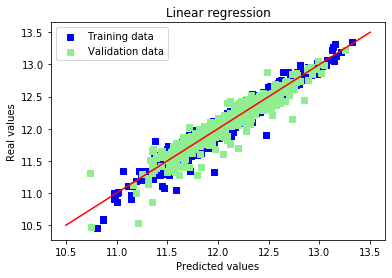

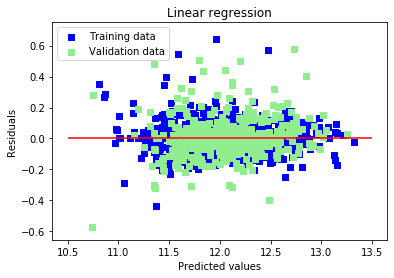

In [29]:
# Plot predictions
plt.scatter(train_pre, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(test_pre, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot residuals
plt.scatter(train_pre, train_pre - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(test_pre, test_pre - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()


In [30]:
lin_train_mse = mean_squared_error(y_train, train_pre)
lin_train_rmse = np.sqrt(lin_train_mse)

lin_test_mse = mean_squared_error(y_test, test_pre)
lin_test_rmse = np.sqrt(lin_test_mse)

print('rmse on train: ',lin_train_rmse)
print('rmse on test: ',lin_test_rmse)

rmse on train:  0.08696355726136644
rmse on test:  0.1307713773112265


In [31]:
# Simple cross validation for linear model 
scores_train = cross_val_score(lr, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
rmse_scores_train = np.sqrt(-scores_train)

scores_test = cross_val_score(lr, X_test, y_test,
                         scoring="neg_mean_squared_error", cv=10)
rmse_scores_test = np.sqrt(-scores_test)

In [32]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    

In [33]:
# score for Training
display_scores(rmse_scores_train)

Scores: [0.12891838 0.16229092 0.12965993 0.15738672 0.11710523 0.11614246
 0.1432097  0.12331894 0.11694746 0.11737592]
Mean: 0.13123556591843338
Standard deviation: 0.016388807738767847


In [99]:
# score for Test
display_scores(rmse_scores_test)

Scores: [0.15140469 0.14933921 0.18842874 0.20282134 0.15233849 0.14019834
 0.18783709 0.2341704  0.14417666 0.15769403]
Mean: 0.17084089929795457
Standard deviation: 0.029388421720327546


### With Ridge Regularization

In [168]:
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train,y_train)
alpha = ridge.alpha_
print('best alpha',alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4],cv = 5)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)
print("Ridge RMSE on Training set :", rmse_CV_train(ridge).mean())
print("Ridge RMSE on Test set :", rmse_CV_test(ridge).mean())
y_train_rdg = ridge.predict(X_train)
y_test_rdg = ridge.predict(X_test)

best alpha 10.0
Try again for more precision with alphas centered around 10.0
Best alpha : 14.0
Ridge RMSE on Training set : 0.116175242830898
Ridge RMSE on Test set : 0.12212880980949559


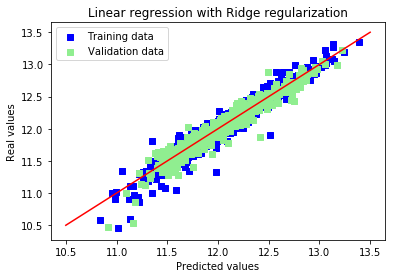

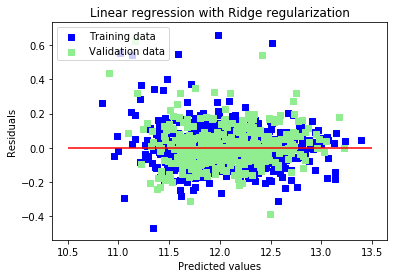

Ridge picked 293 features and eliminated the other 4 features


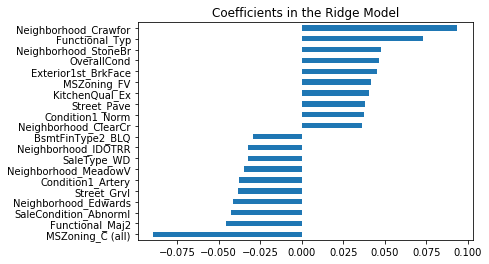

Index(['MSZoning_C (all)', 'Functional_Maj2', 'SaleCondition_Abnorml',
       'Neighborhood_Edwards', 'Street_Grvl', 'Condition1_Artery',
       'Neighborhood_MeadowV', 'SaleType_WD', 'Neighborhood_IDOTRR',
       'BsmtFinType2_BLQ', 'Neighborhood_ClearCr', 'Condition1_Norm',
       'Street_Pave', 'KitchenQual_Ex', 'MSZoning_FV', 'Exterior1st_BrkFace',
       'OverallCond', 'Neighborhood_StoneBr', 'Functional_Typ',
       'Neighborhood_Crawfor'],
      dtype='object')


In [136]:
# Plot predictions
plt.scatter(y_train_rdg, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot residuals
plt.scatter(y_train_rdg, y_train_rdg - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test_rdg - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(ridge.coef_, index = X_train.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()

print(imp_coefs.index)


In [57]:
X_train.shape

(1022, 318)

In [312]:
coef = pd.Series(ridge.coef_, index = X_train.columns)

print("Ridge picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Ridge picked 293 variables and eliminated the other 4 variables


With Lasso Regularization

In [169]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(alphas = [0.0005, 0.001, 0.01, 0.05, 0.1, 0.5, 1, 3, 6, 10, 30, 60])
lasso.fit(X_train,y_train)
alpha = lasso.alpha_
print('best alpha',alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4],cv = 5)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)
print("Lasso RMSE on Training set :", rmse_CV_train(lasso).mean())
print("Lasso RMSE on Test set :", rmse_CV_test(lasso).mean())
y_train_las = lasso.predict(X_train)
y_test_las = lasso.predict(X_test)

best alpha 0.0005
Try again for more precision with alphas centered around 0.0005
Best alpha : 0.0003
Lasso RMSE on Training set : 0.11632123002352128
Lasso RMSE on Test set : 0.12332009440497142


In [314]:
coef = pd.Series(lasso.coef_, index = X_train.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 293 variables and eliminated the other 4 variables


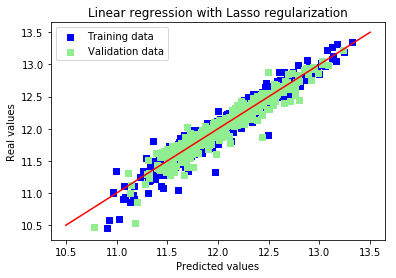

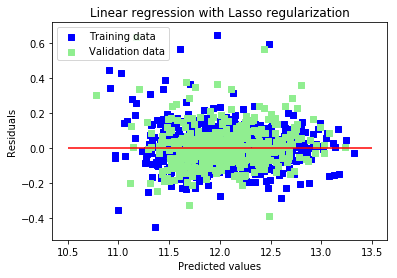

Lasso picked 140 features and eliminated the other 147 features


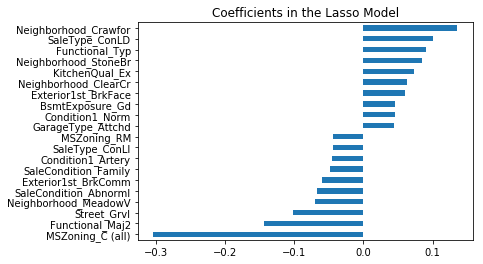

In [170]:
# Plot predictions
plt.scatter(y_train_las, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot residuals
plt.scatter(y_train_las, y_train_las - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test_las - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()





Create prediction on the real test dataset for ridgeCV model which is the best model. 



In [413]:
#test.head()
#test['Id'] = range(1, len(test)+1)
y_test_pred = ridge.predict(test)
y_test_pred = np.exp(y_test_pred) - 1
#jlt = ridge.predict(test)
print(y_test_pred)
#print(len(y_test_pred))
#y_test_pred.shape
test = test.reset_index(drop=True)
test['SalePrice'] = pd.Series(y_test_pred.reshape(1,-1)[0])
#jl = pd.Series(y_test_pred.reshape(1,-1)[0])
#test['Id'] = range(1, len(test)+1)
#print (jl)
#print(test['SalePrice'])
#jl.shape
#test['Id'] = range(1, len(test)+1)
submission = pd.concat([test['Id'], test['SalePrice']], axis=1)
submission.to_csv('submission.csv', index=False)

[117533.9923942  161605.58949267 179174.8629845  ... 171415.59205912
 110079.48735753 214056.23857185]


## Neural Network with Keras/TensorFlow

In [34]:
#import tensorflow as tf
# For TensorFlow v1 compatibily - check https://www.tensorflow.org/guide/migrate
import tensorflow.compat.v1 as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2

from sklearn.metrics import mean_squared_error


tf.disable_v2_behavior()
print(tf.VERSION)
#print(tf.__version__)
print(tf.keras.__version__)

Instructions for updating:
non-resource variables are not supported in the long term
2.0.0
2.2.4-tf


In [35]:
# Checking if our machine has GPUs. Mine does not..
with tf.Session() as sess:
#with tf.compat.v1.Session() as sess:
    devices = sess.list_devices()
    print(devices)

[_DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 268435456, 5000051800915797966), _DeviceAttributes(/job:localhost/replica:0/task:0/device:GPU:0, GPU, 3147261542, 2159991396898389799)]


In [39]:
# Number of node in the hidden layer
H=10
input_dim = X_train.shape[1]

model = models.Sequential()

#Layer 0
# In the hidden layer we just use a linear activation function instead of the usual sigmoid or relu
model.add(layers.Dense(H, input_dim=input_dim, kernel_initializer='normal',
                       activation='linear'))

#Layer 1
model.add(layers.Dense(1, kernel_initializer='normal',
                       activation='linear'))


model.compile(loss='mean_squared_error', optimizer='adam')

model_history = model.fit(X_train, y_train, batch_size=100, epochs=1000, verbose=1) 

Train on 1019 samples
Epoch 1/1000
1019/1019 [==============================] - 0s 156us/sample - loss: 1384.9111
Epoch 2/1000
1019/1019 [==============================] - 0s 43us/sample - loss: 136.8550
Epoch 3/1000
1019/1019 [==============================] - 0s 33us/sample - loss: 211.2690
Epoch 4/1000
1019/1019 [==============================] - 0s 29us/sample - loss: 84.3261
Epoch 5/1000
1019/1019 [==============================] - 0s 36us/sample - loss: 43.1444
Epoch 6/1000
1019/1019 [==============================] - 0s 30us/sample - loss: 26.4035
Epoch 7/1000
1019/1019 [==============================] - 0s 30us/sample - loss: 15.8823
Epoch 8/1000
1019/1019 [==============================] - 0s 28us/sample - loss: 11.1075
Epoch 9/1000
1019/1019 [==============================] - 0s 32us/sample - loss: 8.4513
Epoch 10/1000
1019/1019 [==============================] - 0s 35us/sample - loss: 6.5045
Epoch 11/1000
1019/1019 [==============================] - 0s 36us/sample - loss: 5.

1019/1019 [==============================] - 0s 26us/sample - loss: 0.0902
Epoch 93/1000
1019/1019 [==============================] - 0s 26us/sample - loss: 0.1107
Epoch 94/1000
1019/1019 [==============================] - 0s 25us/sample - loss: 0.2501
Epoch 95/1000
1019/1019 [==============================] - 0s 26us/sample - loss: 0.1885
Epoch 96/1000
1019/1019 [==============================] - 0s 28us/sample - loss: 0.1212
Epoch 97/1000
1019/1019 [==============================] - 0s 25us/sample - loss: 0.1664
Epoch 98/1000
1019/1019 [==============================] - 0s 27us/sample - loss: 0.1173
Epoch 99/1000
1019/1019 [==============================] - 0s 24us/sample - loss: 0.1830
Epoch 100/1000
1019/1019 [==============================] - 0s 24us/sample - loss: 0.7065
Epoch 101/1000
1019/1019 [==============================] - 0s 26us/sample - loss: 5.2414
Epoch 102/1000
1019/1019 [==============================] - 0s 27us/sample - loss: 11.7895
Epoch 103/1000
1019/1019 [=====

Epoch 183/1000
1019/1019 [==============================] - 0s 26us/sample - loss: 0.0514
Epoch 184/1000
1019/1019 [==============================] - 0s 28us/sample - loss: 0.0455
Epoch 185/1000
1019/1019 [==============================] - 0s 28us/sample - loss: 0.0431
Epoch 186/1000
1019/1019 [==============================] - 0s 28us/sample - loss: 0.0480
Epoch 187/1000
1019/1019 [==============================] - 0s 28us/sample - loss: 0.0431
Epoch 188/1000
1019/1019 [==============================] - 0s 25us/sample - loss: 0.0438
Epoch 189/1000
1019/1019 [==============================] - 0s 26us/sample - loss: 0.0482
Epoch 190/1000
1019/1019 [==============================] - 0s 27us/sample - loss: 0.0767
Epoch 191/1000
1019/1019 [==============================] - 0s 29us/sample - loss: 0.0656
Epoch 192/1000
1019/1019 [==============================] - 0s 29us/sample - loss: 0.1643
Epoch 193/1000
1019/1019 [==============================] - 0s 26us/sample - loss: 0.1545
Epoch 194/

1019/1019 [==============================] - 0s 30us/sample - loss: 0.4777
Epoch 274/1000
1019/1019 [==============================] - 0s 25us/sample - loss: 0.9857
Epoch 275/1000
1019/1019 [==============================] - 0s 24us/sample - loss: 0.6402
Epoch 276/1000
1019/1019 [==============================] - 0s 27us/sample - loss: 0.4996
Epoch 277/1000
1019/1019 [==============================] - 0s 31us/sample - loss: 0.2822
Epoch 278/1000
1019/1019 [==============================] - 0s 26us/sample - loss: 0.2831
Epoch 279/1000
1019/1019 [==============================] - 0s 29us/sample - loss: 0.5708
Epoch 280/1000
1019/1019 [==============================] - 0s 27us/sample - loss: 0.8123
Epoch 281/1000
1019/1019 [==============================] - 0s 31us/sample - loss: 0.1293
Epoch 282/1000
1019/1019 [==============================] - 0s 27us/sample - loss: 0.0632
Epoch 283/1000
1019/1019 [==============================] - 0s 29us/sample - loss: 0.0541
Epoch 284/1000
1019/1019 

1019/1019 [==============================] - 0s 28us/sample - loss: 0.8867
Epoch 365/1000
1019/1019 [==============================] - 0s 28us/sample - loss: 0.3924
Epoch 366/1000
1019/1019 [==============================] - 0s 26us/sample - loss: 0.1387
Epoch 367/1000
1019/1019 [==============================] - 0s 33us/sample - loss: 0.1199
Epoch 368/1000
1019/1019 [==============================] - 0s 27us/sample - loss: 0.1424
Epoch 369/1000
1019/1019 [==============================] - 0s 25us/sample - loss: 0.0895
Epoch 370/1000
1019/1019 [==============================] - 0s 26us/sample - loss: 0.1403
Epoch 371/1000
1019/1019 [==============================] - 0s 28us/sample - loss: 0.0726
Epoch 372/1000
1019/1019 [==============================] - 0s 29us/sample - loss: 0.1627
Epoch 373/1000
1019/1019 [==============================] - 0s 26us/sample - loss: 0.0760
Epoch 374/1000
1019/1019 [==============================] - 0s 24us/sample - loss: 0.0601
Epoch 375/1000
1019/1019 

1019/1019 [==============================] - 0s 29us/sample - loss: 0.0834
Epoch 456/1000
1019/1019 [==============================] - 0s 29us/sample - loss: 0.0873
Epoch 457/1000
1019/1019 [==============================] - 0s 26us/sample - loss: 0.0543
Epoch 458/1000
1019/1019 [==============================] - 0s 26us/sample - loss: 0.0371
Epoch 459/1000
1019/1019 [==============================] - 0s 26us/sample - loss: 0.0270
Epoch 460/1000
1019/1019 [==============================] - 0s 27us/sample - loss: 0.0285
Epoch 461/1000
1019/1019 [==============================] - 0s 25us/sample - loss: 0.0274
Epoch 462/1000
1019/1019 [==============================] - 0s 26us/sample - loss: 0.0300
Epoch 463/1000
1019/1019 [==============================] - 0s 27us/sample - loss: 0.0283
Epoch 464/1000
1019/1019 [==============================] - 0s 27us/sample - loss: 0.0257
Epoch 465/1000
1019/1019 [==============================] - 0s 32us/sample - loss: 0.0339
Epoch 466/1000
1019/1019 

1019/1019 [==============================] - 0s 27us/sample - loss: 0.0555
Epoch 547/1000
1019/1019 [==============================] - 0s 29us/sample - loss: 0.0746
Epoch 548/1000
1019/1019 [==============================] - 0s 29us/sample - loss: 0.0481
Epoch 549/1000
1019/1019 [==============================] - 0s 29us/sample - loss: 0.0404
Epoch 550/1000
1019/1019 [==============================] - 0s 27us/sample - loss: 0.0421
Epoch 551/1000
1019/1019 [==============================] - 0s 26us/sample - loss: 0.0348
Epoch 552/1000
1019/1019 [==============================] - 0s 31us/sample - loss: 0.0314
Epoch 553/1000
1019/1019 [==============================] - 0s 28us/sample - loss: 0.0312
Epoch 554/1000
1019/1019 [==============================] - 0s 28us/sample - loss: 0.0299
Epoch 555/1000
1019/1019 [==============================] - 0s 29us/sample - loss: 0.0299
Epoch 556/1000
1019/1019 [==============================] - 0s 27us/sample - loss: 0.0293
Epoch 557/1000
1019/1019 

1019/1019 [==============================] - 0s 32us/sample - loss: 0.0205
Epoch 638/1000
1019/1019 [==============================] - 0s 31us/sample - loss: 0.0215
Epoch 639/1000
1019/1019 [==============================] - 0s 30us/sample - loss: 0.0450
Epoch 640/1000
1019/1019 [==============================] - 0s 30us/sample - loss: 0.0291
Epoch 641/1000
1019/1019 [==============================] - 0s 27us/sample - loss: 0.0215
Epoch 642/1000
1019/1019 [==============================] - 0s 26us/sample - loss: 0.0198
Epoch 643/1000
1019/1019 [==============================] - 0s 27us/sample - loss: 0.0199
Epoch 644/1000
1019/1019 [==============================] - 0s 28us/sample - loss: 0.0194
Epoch 645/1000
1019/1019 [==============================] - 0s 26us/sample - loss: 0.0209
Epoch 646/1000
1019/1019 [==============================] - 0s 26us/sample - loss: 0.0206
Epoch 647/1000
1019/1019 [==============================] - 0s 26us/sample - loss: 0.0207
Epoch 648/1000
1019/1019 

1019/1019 [==============================] - 0s 26us/sample - loss: 0.1603
Epoch 729/1000
1019/1019 [==============================] - 0s 26us/sample - loss: 0.0843
Epoch 730/1000
1019/1019 [==============================] - 0s 28us/sample - loss: 0.0662
Epoch 731/1000
1019/1019 [==============================] - 0s 25us/sample - loss: 0.1318
Epoch 732/1000
1019/1019 [==============================] - 0s 27us/sample - loss: 0.1175
Epoch 733/1000
1019/1019 [==============================] - 0s 25us/sample - loss: 0.0890
Epoch 734/1000
1019/1019 [==============================] - 0s 28us/sample - loss: 0.0520
Epoch 735/1000
1019/1019 [==============================] - 0s 28us/sample - loss: 0.0785
Epoch 736/1000
1019/1019 [==============================] - 0s 27us/sample - loss: 0.1000
Epoch 737/1000
1019/1019 [==============================] - 0s 27us/sample - loss: 0.0485
Epoch 738/1000
1019/1019 [==============================] - 0s 26us/sample - loss: 0.0414
Epoch 739/1000
1019/1019 

1019/1019 [==============================] - 0s 26us/sample - loss: 0.0200
Epoch 819/1000
1019/1019 [==============================] - 0s 26us/sample - loss: 0.0213
Epoch 820/1000
1019/1019 [==============================] - 0s 28us/sample - loss: 0.0191
Epoch 821/1000
1019/1019 [==============================] - 0s 26us/sample - loss: 0.0183
Epoch 822/1000
1019/1019 [==============================] - 0s 28us/sample - loss: 0.0184
Epoch 823/1000
1019/1019 [==============================] - 0s 25us/sample - loss: 0.0185
Epoch 824/1000
1019/1019 [==============================] - 0s 27us/sample - loss: 0.0278
Epoch 825/1000
1019/1019 [==============================] - 0s 27us/sample - loss: 0.0239
Epoch 826/1000
1019/1019 [==============================] - 0s 26us/sample - loss: 0.0195
Epoch 827/1000
1019/1019 [==============================] - 0s 24us/sample - loss: 0.0180
Epoch 828/1000
1019/1019 [==============================] - 0s 25us/sample - loss: 0.0187
Epoch 829/1000
1019/1019 

1019/1019 [==============================] - 0s 32us/sample - loss: 1.5126
Epoch 910/1000
1019/1019 [==============================] - 0s 31us/sample - loss: 0.8790
Epoch 911/1000
1019/1019 [==============================] - 0s 28us/sample - loss: 0.6184
Epoch 912/1000
1019/1019 [==============================] - 0s 28us/sample - loss: 2.5774
Epoch 913/1000
1019/1019 [==============================] - 0s 26us/sample - loss: 1.1357
Epoch 914/1000
1019/1019 [==============================] - 0s 27us/sample - loss: 1.9577
Epoch 915/1000
1019/1019 [==============================] - 0s 28us/sample - loss: 0.3712
Epoch 916/1000
1019/1019 [==============================] - 0s 31us/sample - loss: 0.1884
Epoch 917/1000
1019/1019 [==============================] - 0s 30us/sample - loss: 0.1828
Epoch 918/1000
1019/1019 [==============================] - 0s 26us/sample - loss: 0.0549
Epoch 919/1000
1019/1019 [==============================] - 0s 27us/sample - loss: 0.0751
Epoch 920/1000
1019/1019 

1019/1019 [==============================] - 0s 32us/sample - loss: 0.0201


In [40]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [41]:
train_mse = mean_squared_error(y_train, train_pred)
train_rmse = np.sqrt(train_mse)
train_score = model.evaluate(X_train, y_train, verbose=1)

test_mse = mean_squared_error(y_test, test_pred)
test_rmse = np.sqrt(test_mse)
test_score = model.evaluate(X_test, y_test, verbose=1)

print('rmse on train: ',train_rmse)
print('Train loss:', train_score)

print('rmse on test: ',test_rmse)
print('Test loss:', test_score)

437/437 [==============================] - 0s 32us/sample - loss: 0.0200
rmse on train:  0.14150344640923535
Train loss: 0.020023228068698027
rmse on test:  0.14158527240057253
Test loss: 0.020046395059990393


## Fitting the model with others options

In [42]:
model_history2 = model.fit(X_train, y_train, batch_size=256, epochs=1000, \
                          shuffle = True, validation_split=0.5)

Train on 509 samples, validate on 510 samples
Epoch 1/1000
509/509 [==============================] - 2s 3ms/sample - loss: 0.0221 - val_loss: 0.0180
Epoch 2/1000
509/509 [==============================] - 0s 24us/sample - loss: 0.0221 - val_loss: 0.0181
Epoch 3/1000
509/509 [==============================] - 0s 22us/sample - loss: 0.0221 - val_loss: 0.0181
Epoch 4/1000
509/509 [==============================] - 0s 26us/sample - loss: 0.0221 - val_loss: 0.0181
Epoch 5/1000
509/509 [==============================] - 0s 28us/sample - loss: 0.0221 - val_loss: 0.0181
Epoch 6/1000
509/509 [==============================] - 0s 25us/sample - loss: 0.0220 - val_loss: 0.0180
Epoch 7/1000
509/509 [==============================] - 0s 32us/sample - loss: 0.0220 - val_loss: 0.0180
Epoch 8/1000
509/509 [==============================] - 0s 29us/sample - loss: 0.0220 - val_loss: 0.0180
Epoch 9/1000
509/509 [==============================] - 0s 26us/sample - loss: 0.0220 - val_loss: 0.0180
Epoch 10/1

Epoch 78/1000
509/509 [==============================] - 0s 26us/sample - loss: 0.0214 - val_loss: 0.0183
Epoch 79/1000
509/509 [==============================] - 0s 22us/sample - loss: 0.0214 - val_loss: 0.0183
Epoch 80/1000
509/509 [==============================] - 0s 18us/sample - loss: 0.0214 - val_loss: 0.0183
Epoch 81/1000
509/509 [==============================] - 0s 24us/sample - loss: 0.0214 - val_loss: 0.0183
Epoch 82/1000
509/509 [==============================] - 0s 22us/sample - loss: 0.0214 - val_loss: 0.0183
Epoch 83/1000
509/509 [==============================] - ETA: 0s - loss: 0.020 - 0s 24us/sample - loss: 0.0214 - val_loss: 0.0183
Epoch 84/1000
509/509 [==============================] - 0s 28us/sample - loss: 0.0214 - val_loss: 0.0183
Epoch 85/1000
509/509 [==============================] - 0s 26us/sample - loss: 0.0214 - val_loss: 0.0183
Epoch 86/1000
509/509 [==============================] - 0s 28us/sample - loss: 0.0214 - val_loss: 0.0183
Epoch 87/1000
509/509 

509/509 [==============================] - 0s 20us/sample - loss: 0.0210 - val_loss: 0.0183
Epoch 155/1000
509/509 [==============================] - 0s 22us/sample - loss: 0.0210 - val_loss: 0.0183
Epoch 156/1000
509/509 [==============================] - 0s 20us/sample - loss: 0.0210 - val_loss: 0.0183
Epoch 157/1000
509/509 [==============================] - 0s 22us/sample - loss: 0.0210 - val_loss: 0.0183
Epoch 158/1000
509/509 [==============================] - 0s 20us/sample - loss: 0.0210 - val_loss: 0.0183
Epoch 159/1000
509/509 [==============================] - 0s 22us/sample - loss: 0.0210 - val_loss: 0.0183
Epoch 160/1000
509/509 [==============================] - 0s 28us/sample - loss: 0.0210 - val_loss: 0.0183
Epoch 161/1000
509/509 [==============================] - 0s 20us/sample - loss: 0.0210 - val_loss: 0.0183
Epoch 162/1000
509/509 [==============================] - 0s 29us/sample - loss: 0.0210 - val_loss: 0.0183
Epoch 163/1000
509/509 [============================

509/509 [==============================] - 0s 20us/sample - loss: 0.0207 - val_loss: 0.0182
Epoch 231/1000
509/509 [==============================] - 0s 22us/sample - loss: 0.0207 - val_loss: 0.0182
Epoch 232/1000
509/509 [==============================] - 0s 24us/sample - loss: 0.0207 - val_loss: 0.0182
Epoch 233/1000
509/509 [==============================] - 0s 24us/sample - loss: 0.0207 - val_loss: 0.0182
Epoch 234/1000
509/509 [==============================] - 0s 23us/sample - loss: 0.0207 - val_loss: 0.0182
Epoch 235/1000
509/509 [==============================] - 0s 22us/sample - loss: 0.0207 - val_loss: 0.0182
Epoch 236/1000
509/509 [==============================] - 0s 22us/sample - loss: 0.0207 - val_loss: 0.0182
Epoch 237/1000
509/509 [==============================] - 0s 24us/sample - loss: 0.0207 - val_loss: 0.0182
Epoch 238/1000
509/509 [==============================] - 0s 24us/sample - loss: 0.0207 - val_loss: 0.0182
Epoch 239/1000
509/509 [============================

509/509 [==============================] - 0s 20us/sample - loss: 0.0204 - val_loss: 0.0181
Epoch 307/1000
509/509 [==============================] - 0s 20us/sample - loss: 0.0204 - val_loss: 0.0180
Epoch 308/1000
509/509 [==============================] - 0s 24us/sample - loss: 0.0204 - val_loss: 0.0181
Epoch 309/1000
509/509 [==============================] - 0s 20us/sample - loss: 0.0204 - val_loss: 0.0181
Epoch 310/1000
509/509 [==============================] - 0s 24us/sample - loss: 0.0204 - val_loss: 0.0181
Epoch 311/1000
509/509 [==============================] - 0s 20us/sample - loss: 0.0204 - val_loss: 0.0180
Epoch 312/1000
509/509 [==============================] - 0s 20us/sample - loss: 0.0204 - val_loss: 0.0180
Epoch 313/1000
509/509 [==============================] - 0s 22us/sample - loss: 0.0204 - val_loss: 0.0180
Epoch 314/1000
509/509 [==============================] - 0s 20us/sample - loss: 0.0204 - val_loss: 0.0180
Epoch 315/1000
509/509 [============================

509/509 [==============================] - 0s 24us/sample - loss: 0.0201 - val_loss: 0.0179
Epoch 383/1000
509/509 [==============================] - 0s 26us/sample - loss: 0.0201 - val_loss: 0.0179
Epoch 384/1000
509/509 [==============================] - 0s 26us/sample - loss: 0.0201 - val_loss: 0.0179
Epoch 385/1000
509/509 [==============================] - 0s 29us/sample - loss: 0.0201 - val_loss: 0.0179
Epoch 386/1000
509/509 [==============================] - 0s 26us/sample - loss: 0.0201 - val_loss: 0.0179
Epoch 387/1000
509/509 [==============================] - 0s 24us/sample - loss: 0.0201 - val_loss: 0.0179
Epoch 388/1000
509/509 [==============================] - 0s 24us/sample - loss: 0.0201 - val_loss: 0.0179
Epoch 389/1000
509/509 [==============================] - 0s 24us/sample - loss: 0.0201 - val_loss: 0.0179
Epoch 390/1000
509/509 [==============================] - 0s 22us/sample - loss: 0.0201 - val_loss: 0.0179
Epoch 391/1000
509/509 [============================

509/509 [==============================] - 0s 22us/sample - loss: 0.0198 - val_loss: 0.0178
Epoch 459/1000
509/509 [==============================] - 0s 22us/sample - loss: 0.0198 - val_loss: 0.0178
Epoch 460/1000
509/509 [==============================] - 0s 29us/sample - loss: 0.0198 - val_loss: 0.0177
Epoch 461/1000
509/509 [==============================] - 0s 22us/sample - loss: 0.0198 - val_loss: 0.0177
Epoch 462/1000
509/509 [==============================] - 0s 26us/sample - loss: 0.0198 - val_loss: 0.0177
Epoch 463/1000
509/509 [==============================] - 0s 22us/sample - loss: 0.0198 - val_loss: 0.0178
Epoch 464/1000
509/509 [==============================] - 0s 24us/sample - loss: 0.0198 - val_loss: 0.0177
Epoch 465/1000
509/509 [==============================] - 0s 26us/sample - loss: 0.0198 - val_loss: 0.0178
Epoch 466/1000
509/509 [==============================] - 0s 26us/sample - loss: 0.0198 - val_loss: 0.0178
Epoch 467/1000
509/509 [============================

509/509 [==============================] - 0s 22us/sample - loss: 0.0195 - val_loss: 0.0176
Epoch 535/1000
509/509 [==============================] - 0s 24us/sample - loss: 0.0195 - val_loss: 0.0176
Epoch 536/1000
509/509 [==============================] - 0s 24us/sample - loss: 0.0195 - val_loss: 0.0176
Epoch 537/1000
509/509 [==============================] - 0s 24us/sample - loss: 0.0195 - val_loss: 0.0177
Epoch 538/1000
509/509 [==============================] - 0s 26us/sample - loss: 0.0195 - val_loss: 0.0176
Epoch 539/1000
509/509 [==============================] - 0s 24us/sample - loss: 0.0195 - val_loss: 0.0176
Epoch 540/1000
509/509 [==============================] - 0s 24us/sample - loss: 0.0195 - val_loss: 0.0176
Epoch 541/1000
509/509 [==============================] - 0s 22us/sample - loss: 0.0195 - val_loss: 0.0176
Epoch 542/1000
509/509 [==============================] - 0s 24us/sample - loss: 0.0195 - val_loss: 0.0176
Epoch 543/1000
509/509 [============================

509/509 [==============================] - 0s 20us/sample - loss: 0.0192 - val_loss: 0.0175
Epoch 611/1000
509/509 [==============================] - 0s 22us/sample - loss: 0.0192 - val_loss: 0.0175
Epoch 612/1000
509/509 [==============================] - 0s 22us/sample - loss: 0.0192 - val_loss: 0.0174
Epoch 613/1000
509/509 [==============================] - 0s 20us/sample - loss: 0.0191 - val_loss: 0.0174
Epoch 614/1000
509/509 [==============================] - 0s 22us/sample - loss: 0.0191 - val_loss: 0.0174
Epoch 615/1000
509/509 [==============================] - 0s 22us/sample - loss: 0.0192 - val_loss: 0.0175
Epoch 616/1000
509/509 [==============================] - 0s 22us/sample - loss: 0.0192 - val_loss: 0.0174
Epoch 617/1000
509/509 [==============================] - 0s 24us/sample - loss: 0.0191 - val_loss: 0.0174
Epoch 618/1000
509/509 [==============================] - 0s 26us/sample - loss: 0.0191 - val_loss: 0.0174
Epoch 619/1000
509/509 [============================

509/509 [==============================] - 0s 20us/sample - loss: 0.0188 - val_loss: 0.0173
Epoch 687/1000
509/509 [==============================] - 0s 20us/sample - loss: 0.0188 - val_loss: 0.0173
Epoch 688/1000
509/509 [==============================] - 0s 22us/sample - loss: 0.0188 - val_loss: 0.0173
Epoch 689/1000
509/509 [==============================] - 0s 26us/sample - loss: 0.0189 - val_loss: 0.0173
Epoch 690/1000
509/509 [==============================] - 0s 28us/sample - loss: 0.0188 - val_loss: 0.0173
Epoch 691/1000
509/509 [==============================] - 0s 22us/sample - loss: 0.0188 - val_loss: 0.0173
Epoch 692/1000
509/509 [==============================] - 0s 24us/sample - loss: 0.0188 - val_loss: 0.0173
Epoch 693/1000
509/509 [==============================] - 0s 24us/sample - loss: 0.0188 - val_loss: 0.0173
Epoch 694/1000
509/509 [==============================] - 0s 22us/sample - loss: 0.0188 - val_loss: 0.0173
Epoch 695/1000
509/509 [============================

509/509 [==============================] - 0s 22us/sample - loss: 0.0185 - val_loss: 0.0171
Epoch 763/1000
509/509 [==============================] - 0s 22us/sample - loss: 0.0185 - val_loss: 0.0172
Epoch 764/1000
509/509 [==============================] - 0s 26us/sample - loss: 0.0185 - val_loss: 0.0172
Epoch 765/1000
509/509 [==============================] - 0s 26us/sample - loss: 0.0185 - val_loss: 0.0172
Epoch 766/1000
509/509 [==============================] - 0s 24us/sample - loss: 0.0185 - val_loss: 0.0172
Epoch 767/1000
509/509 [==============================] - 0s 26us/sample - loss: 0.0185 - val_loss: 0.0171
Epoch 768/1000
509/509 [==============================] - 0s 26us/sample - loss: 0.0185 - val_loss: 0.0171
Epoch 769/1000
509/509 [==============================] - 0s 24us/sample - loss: 0.0185 - val_loss: 0.0171
Epoch 770/1000
509/509 [==============================] - 0s 28us/sample - loss: 0.0185 - val_loss: 0.0171
Epoch 771/1000
509/509 [============================

509/509 [==============================] - 0s 24us/sample - loss: 0.0182 - val_loss: 0.0170
Epoch 839/1000
509/509 [==============================] - 0s 22us/sample - loss: 0.0182 - val_loss: 0.0170
Epoch 840/1000
509/509 [==============================] - 0s 22us/sample - loss: 0.0182 - val_loss: 0.0170
Epoch 841/1000
509/509 [==============================] - 0s 24us/sample - loss: 0.0182 - val_loss: 0.0170
Epoch 842/1000
509/509 [==============================] - 0s 22us/sample - loss: 0.0182 - val_loss: 0.0170
Epoch 843/1000
509/509 [==============================] - 0s 22us/sample - loss: 0.0182 - val_loss: 0.0170
Epoch 844/1000
509/509 [==============================] - 0s 23us/sample - loss: 0.0181 - val_loss: 0.0170
Epoch 845/1000
509/509 [==============================] - 0s 26us/sample - loss: 0.0181 - val_loss: 0.0170
Epoch 846/1000
509/509 [==============================] - 0s 24us/sample - loss: 0.0181 - val_loss: 0.0170
Epoch 847/1000
509/509 [============================

509/509 [==============================] - 0s 24us/sample - loss: 0.0178 - val_loss: 0.0169
Epoch 915/1000
509/509 [==============================] - 0s 22us/sample - loss: 0.0178 - val_loss: 0.0169
Epoch 916/1000
509/509 [==============================] - 0s 25us/sample - loss: 0.0178 - val_loss: 0.0169
Epoch 917/1000
509/509 [==============================] - 0s 24us/sample - loss: 0.0178 - val_loss: 0.0169
Epoch 918/1000
509/509 [==============================] - 0s 28us/sample - loss: 0.0178 - val_loss: 0.0168
Epoch 919/1000
509/509 [==============================] - 0s 28us/sample - loss: 0.0178 - val_loss: 0.0168
Epoch 920/1000
509/509 [==============================] - 0s 22us/sample - loss: 0.0178 - val_loss: 0.0168
Epoch 921/1000
509/509 [==============================] - 0s 20us/sample - loss: 0.0178 - val_loss: 0.0169
Epoch 922/1000
509/509 [==============================] - 0s 24us/sample - loss: 0.0178 - val_loss: 0.0169
Epoch 923/1000
509/509 [============================

509/509 [==============================] - 0s 22us/sample - loss: 0.0175 - val_loss: 0.0167
Epoch 991/1000
509/509 [==============================] - 0s 24us/sample - loss: 0.0175 - val_loss: 0.0167
Epoch 992/1000
509/509 [==============================] - 0s 22us/sample - loss: 0.0175 - val_loss: 0.0167
Epoch 993/1000
509/509 [==============================] - 0s 24us/sample - loss: 0.0175 - val_loss: 0.0167
Epoch 994/1000
509/509 [==============================] - 0s 26us/sample - loss: 0.0175 - val_loss: 0.0168
Epoch 995/1000
509/509 [==============================] - 0s 24us/sample - loss: 0.0175 - val_loss: 0.0168
Epoch 996/1000
509/509 [==============================] - 0s 24us/sample - loss: 0.0175 - val_loss: 0.0167
Epoch 997/1000
509/509 [==============================] - 0s 26us/sample - loss: 0.0175 - val_loss: 0.0167
Epoch 998/1000
509/509 [==============================] - 0s 24us/sample - loss: 0.0175 - val_loss: 0.0167
Epoch 999/1000
509/509 [============================

In [43]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [44]:
train_mse = mean_squared_error(y_train, train_pred)
train_rmse = np.sqrt(train_mse)
train_score = model.evaluate(X_train, y_train, verbose=1)

test_mse = mean_squared_error(y_test, test_pred)
test_rmse = np.sqrt(test_mse)
test_score = model.evaluate(X_test, y_test, verbose=1)

print('rmse on train: ',train_rmse)
print('Train loss:', train_score)

print('rmse on test: ',test_rmse)
print('Test loss:', test_score)

437/437 [==============================] - 0s 32us/sample - loss: 0.0184
rmse on train:  0.1307215000567737
Train loss: 0.017088113275883943
rmse on test:  0.13574172687386096
Test loss: 0.018425821780612868
